# Tennis Outcome Prediction

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
# plt.rcParams['figure.figsize'] = [100, 100]

## Read in data and re-format

Read in data and re-format data to work with scikit-learn

In [3]:
df = pd.read_csv("mens_train_file.csv")
#data = np.loadtxt("mens_train_file.csv",delimiter=',',skiprows=1)

print(df.columns)
df.head()

Index(['rally', 'serve', 'hitpoint', 'speed', 'net.clearance',
       'distance.from.sideline', 'depth', 'outside.sideline',
       'outside.baseline', 'player.distance.travelled', 'player.impact.depth',
       'player.impact.distance.from.center', 'player.depth',
       'player.distance.from.center', 'previous.speed',
       'previous.net.clearance', 'previous.distance.from.sideline',
       'previous.depth', 'opponent.depth', 'opponent.distance.from.center',
       'same.side', 'previous.hitpoint', 'previous.time.to.net',
       'server.is.impact.player', 'outcome', 'gender'],
      dtype='object')


,rally,serve,hitpoint,speed,net.clearance,distance.from.sideline,depth,outside.sideline,outside.baseline,player.distance.travelled,...,previous.distance.from.sideline,previous.depth,opponent.depth,opponent.distance.from.center,same.side,previous.hitpoint,previous.time.to.net,server.is.impact.player,outcome,gender
0,4,1,B,35.515042,-0.021725,3.474766,6.797621,0,0,1.467570,...,2.449182,0.705435,12.5628,2.0724,1,F,0.445318,0,UE,mens
1,4,2,B,33.382640,1.114202,2.540801,2.608708,0,1,2.311931,...,0.583291,3.856600,12.3544,5.1124,0,B,0.432434,0,FE,mens
2,23,1,B,22.316690,-0.254046,3.533166,9.435749,0,0,3.903728,...,1.115250,2.908892,13.8620,1.6564,0,F,0.397538,1,FE,mens
3,9,1,F,36.837309,0.766694,0.586885,3.342180,1,0,0.583745,...,3.256695,0.557554,14.2596,0.1606,1,B,0.671984,1,UE,mens
4,4,1,B,35.544208,0.116162,0.918725,5.499119,0,0,2.333456,...,1.431146,3.945317,11.3658,1.1082,0,F,0.340411,0,W,mens


In [4]:
#drop gender column for now
df.drop("gender",axis=1, inplace=True)

In [5]:
#recode hitpoint to integers [B->0, F->1, U->2, V->3]
hitpoint = np.unique(df.loc[:,'hitpoint'])
# print(hitpoint)
df.replace(hitpoint, [0, 1, 2, 3], inplace=True)

#recode outcome to integers [FE -> 0, UE -> 1, W ->2]
outcomes = np.unique(df.loc[:,'outcome'])
# print(outcomes)
df.replace(outcomes,[0,1,2], inplace=True)

outcomes

array(['FE', 'UE', 'W'], dtype=object)

# Visualize the data

In [6]:
def visualize_data(dimension1, dimension2):
       
    # forced errors
    plt.plot(df.loc[df.outcome==0,dimension1],
            df.loc[df.outcome==0,dimension2],
            'b.',
            label="FE")

    # unforced errors
    plt.plot(df.loc[df.outcome==1,dimension1],
            df.loc[df.outcome==1,dimension2],
            'r.',
            label="UE")

    # winners
    plt.plot(df.loc[df.outcome==2,dimension1],
            df.loc[df.outcome==2,dimension2],
            'g.',
            label="W")

    plt.title("%s by %s" % (dimension1,dimension2))
    plt.xlabel(dimension1)
    plt.ylabel(dimension2)
    plt.legend()
    plt.show()
    
    


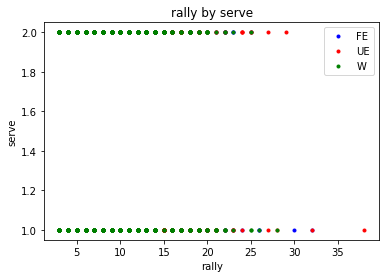

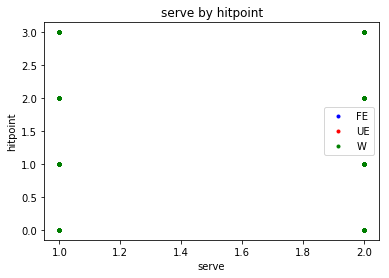

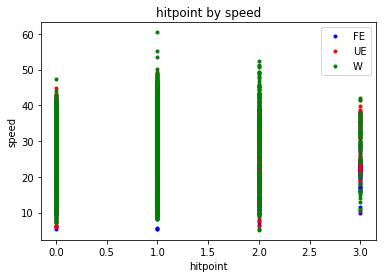

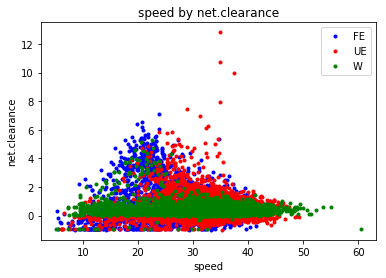

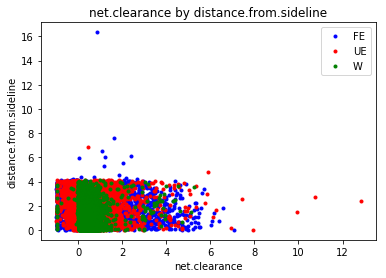

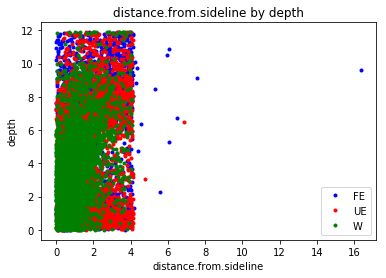

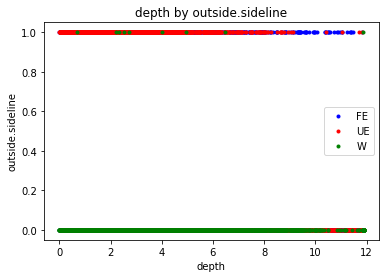

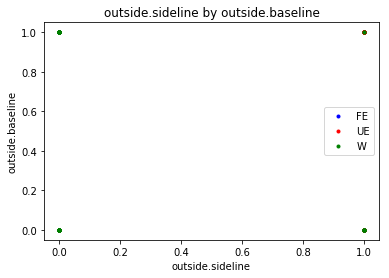

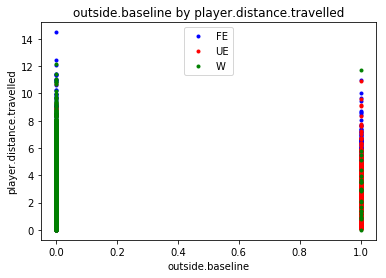

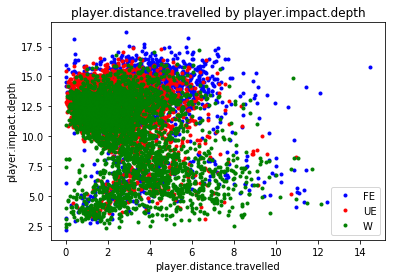

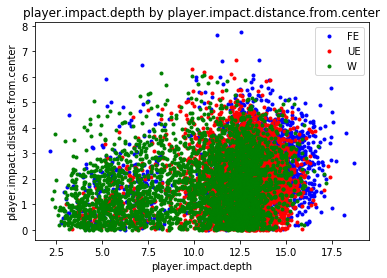

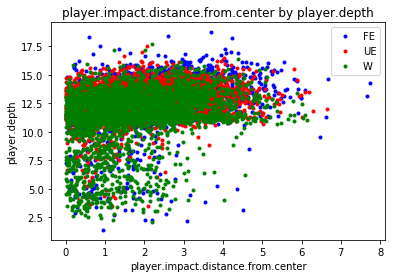

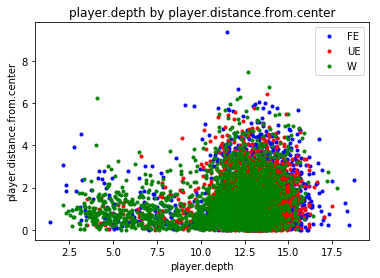

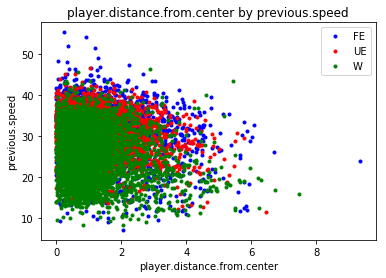

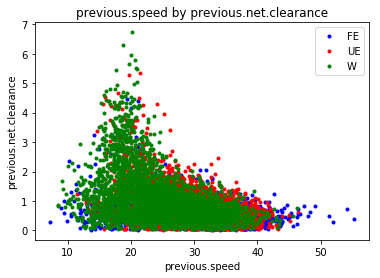

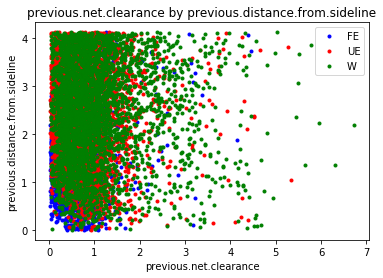

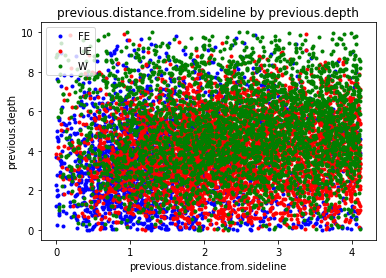

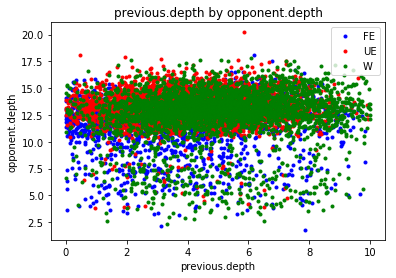

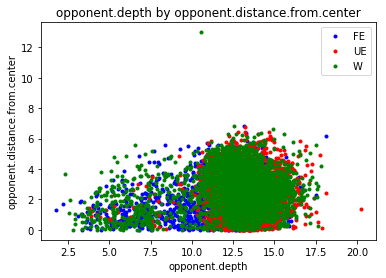

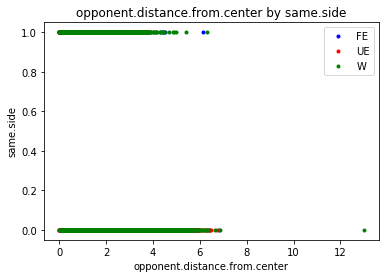

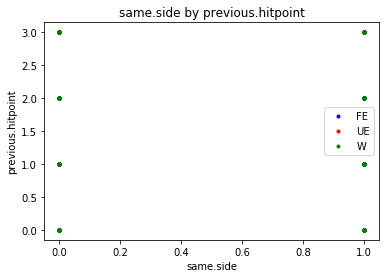

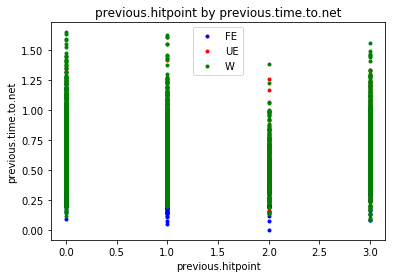

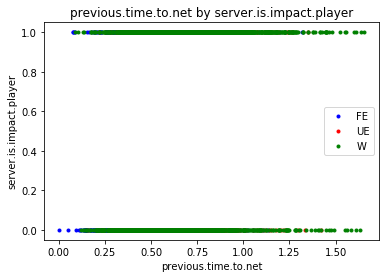

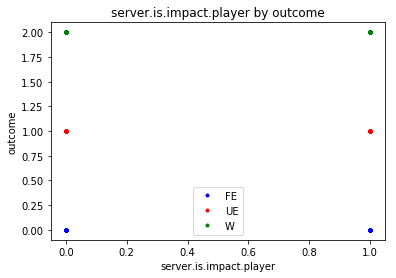

In [7]:
columns = df.columns

for i in range(len(columns)-1):
    plt.figure(i)
#     plt.subplot(9,3,i+1)
    visualize_data(columns[i], columns[i+1])


# Create Training/Dev/Test Sets

1. create training/dev/test sets
1.a) scale the data
2. train model
3. evaluate on dev
4. get accuracy
5. get confusion matrix



In [8]:
#import scikit-learn modules
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [9]:
#create feature matrix and label vectors
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_dev, X_test, y_dev, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)


In [10]:
#scale the data
preprocesser = Pipeline([('scaler', preprocessing.StandardScaler())])
preprocesser.fit(X_train)
X_train_scaled = preprocesser.transform(X_train)
X_test_scaled = preprocesser.transform(X_test)
X_dev_scaled = preprocesser.transform(X_dev)

In [11]:
#train the model
clf = MLPClassifier(solver='adam', 
                    alpha=0, #no regularization to start
                    batch_size="auto",
                    learning_rate='adaptive',
                    learning_rate_init=0.001,
                    max_iter=500,
                    hidden_layer_sizes=(6,2), 
                    verbose=False,
                    random_state=1).fit(X_train,y_train)
    

In [12]:
#calculate accuracies
y_pred_train = clf.predict(X_train)
y_pred_dev = clf.predict(X_dev)
y_pred_test = clf.predict(X_test)

train_acc = accuracy_score(y_train, y_pred_train)
dev_acc = accuracy_score(y_dev,y_pred_dev)
test_acc = accuracy_score(y_test, y_pred_test)

print("train accuracy: %.3f" % train_acc)
print("dev accuracy: %.3f" % dev_acc)
print("test accuracy: %.3f" % test_acc)
print(classification_report(y_train, y_pred_train, target_names=outcomes))

train accuracy: 0.807
dev accuracy: 0.808
test accuracy: 0.813
             precision    recall  f1-score   support

         FE       0.74      0.64      0.69      1797
         UE       0.82      0.81      0.82      3525
          W       0.83      0.91      0.87      2678

avg / total       0.80      0.81      0.80      8000



[[0.64329438 0.13758865 0.05825243]
 [0.1736227  0.81134752 0.13181479]
 [0.05286589 0.04113475 0.91038088]]


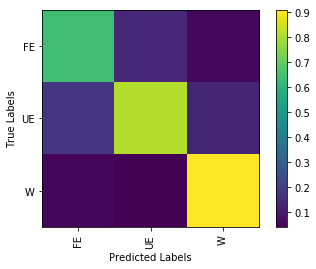

In [29]:
#plot confusion matrix
c=confusion_matrix(y_train,y_pred_train)
c_norm = np.sum(c,axis=1)
c_norm = c/c_norm
plt.imshow(c_norm)
plt.colorbar()
tick_marks = np.arange(len(outcomes))
plt.xticks(tick_marks, outcomes, rotation=90)
plt.yticks(tick_marks, outcomes)
#plt.tight_layout()
plt.ylabel("True Labels")
plt.xlabel("Predicted Labels")

#print confusion matrix
pd.crosstab(y_train, y_pred_train, rownames=['True'], colnames=['Predicted'], margins=True)
print(c_norm)

## Observations

The classifier has a harder time predicting the unforced and forced error than winners. Next steps would be to focus on targeting these examples.

In [ ]:
#h=plt.hist(y_train, histtype='bar',density=False)